# Machine Learning and Statistics Assignment 

## Autumn/Winter 2021

---
### Part 2 - scipy.stats
---

<br>

![scikit_logo](Images/scipy_logo.png)

<br>

### 1. Overview of the scipy-stats Python library
[scipy.stats homepage](https://docs.scipy.org/doc/scipy/reference/stats.html)

<br>

`Scipy.stats` is a sub-package of the `SciPy` library and is used primarily for statistics. Scipy itself is a powerful library used to perform mathematical, scientific and engineering computations, and is built and depends upon the `NumPy` library.
SciPy stands for Scientific Python. It was created by the same person who created NumPy, Travis Olliphant, with help from the open source community. It builds on NumPy with added and optimized functions. We will discuss and demonstrate some of the more basic techniques first and then to on to look at more complicated functions including a hypothesis test using ANOVA.

Scipy.stats *"contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more."* 
https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

We will begin by going through some of the main statistical significance tests included in the package before moving on to an in-depth look at one-way ANOVA.  

Firstly we import all of the necessary libraries.

In [1]:
# For data frames
import pandas as pd

# For plots
import seaborn as sns

# For statistics
import scipy.stats as ss

# Numerical arrays
import numpy as np

# plotting
import matplotlib.pyplot as plt

# tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# set global size for all plots
plt.rcParams["figure.figsize"] = (15,10)

# set global style for all plots
plt.style.use('ggplot')

<br>

---

### Distributions

---

We'll begin by taking a look at some of the more important probability distributions in the scipy.stats module. A probability distribution is a function that dictates the liklihoods of random values in a given range and parameters.

#### Uniform  
This is the simplest of all of the distributions. Basically there is an equal chance of any number in a given range being returned. The parameters are `size=10000`- number of values returned, `loc=10` - the mean, `scale=20` - the standard deviation. `rvs` specifies 'random variates'.

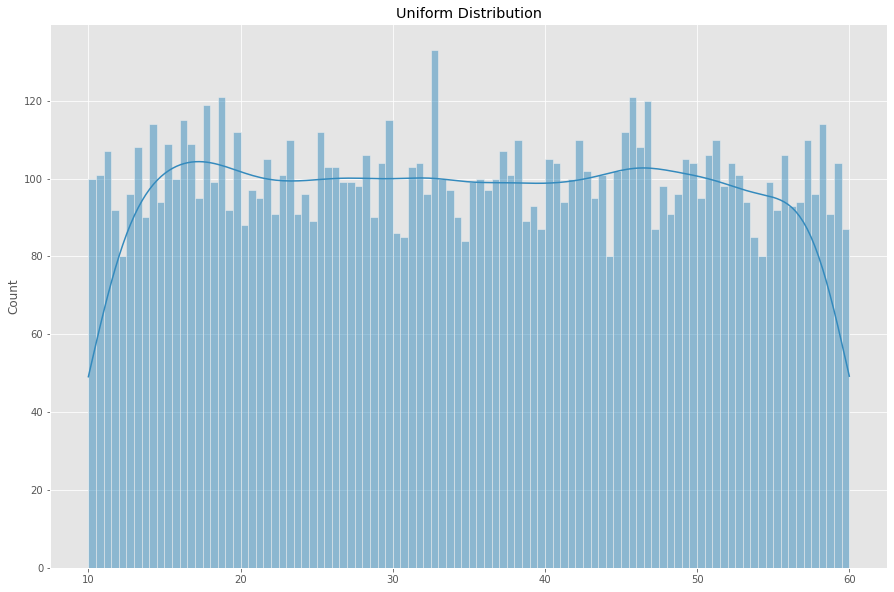

In [3]:
# create a uniformly distributed array of 10000 values
x = ss.uniform.rvs(size=10000, loc=10, scale=50)

# set plot title
plt.title("Uniform Distribution")

# create the histogram with 100 bins and a KDE line
sns.histplot(x, bins=100, kde=True);

#### Normal
Normal distribution is one of the most common distributions and is instantly recognisable in plot form due to it resembling a bell curve. The peak of the 'bell' is centred around the mean with a graded drop-off the further you go from the mean. In terms of coding, we use the same parameters as before.

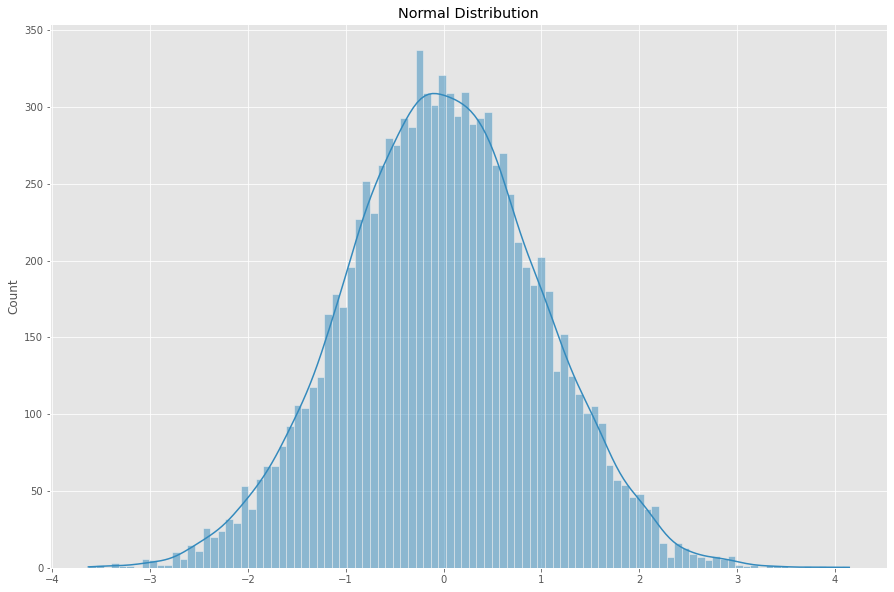

In [4]:
# create a normally distributed array of 10000 values
y = ss.norm.rvs(size=10000,loc=0,scale=1)

# set plot title
plt.title("Normal Distribution")

# create histogram
sns.histplot(y, bins=100, kde=True);

#### Exponential
Exponential distribution is the probability distribution of the time between events in a Poisson process. Simply an attempt to predict the amount of waiting time until the next event occurs. It is recognisable with it's distintive downward slope.

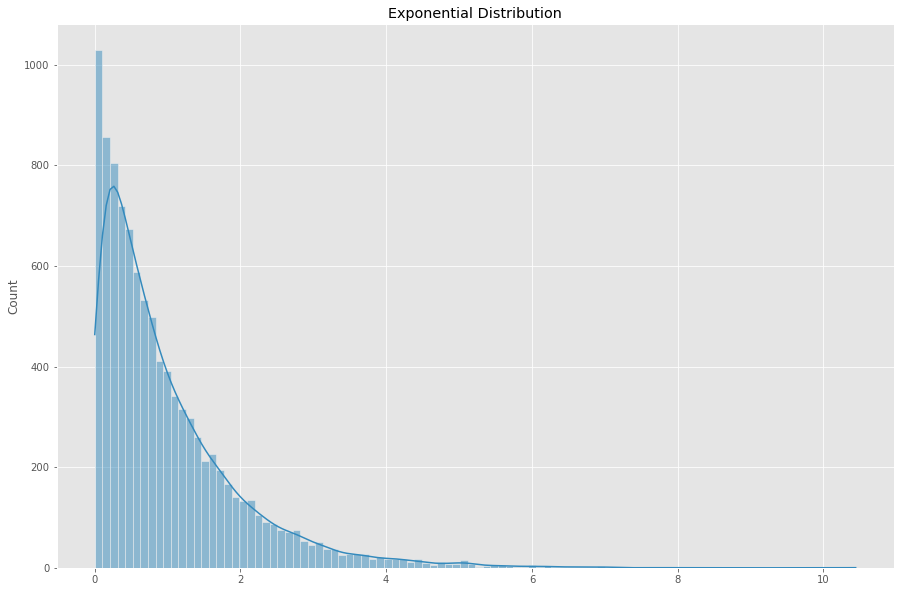

In [5]:
# create an exponentially distributed array of 10000 values
z = ss.expon.rvs(scale=1,loc=0,size=10000)

# set plot title
plt.title("Exponential Distribution")

# create the histogram
sns.histplot(z, bins=100, kde=True);

#### Poisson
Poisson distribution is used to model the number of times an event happened in a time interval. For example, the number of people entering a shop in a given time interval can be thought of a Poisson process. In this case `loc` will be the startring point of the distribution, `mu` (μ) will be the shape parameter or mean, and `size` the number of values.

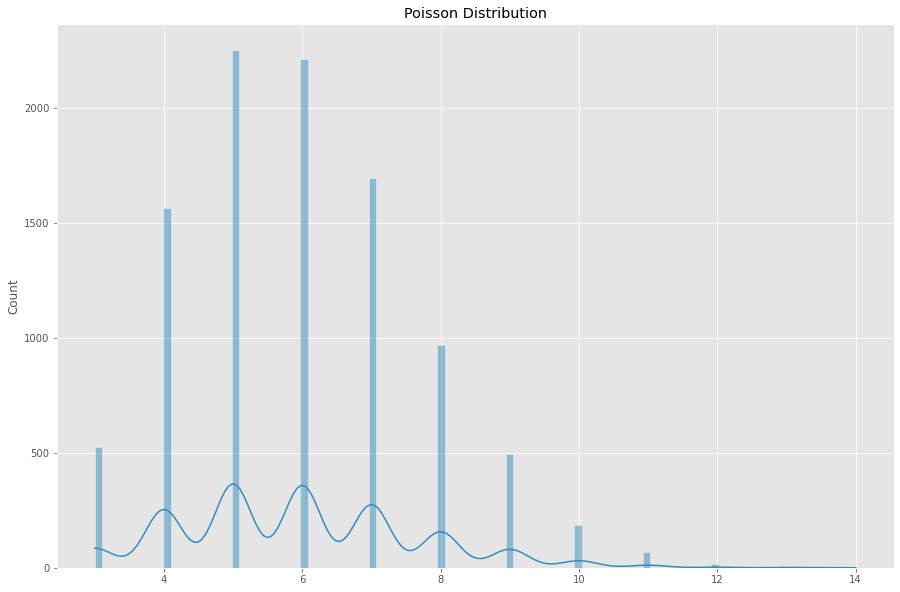

In [6]:
# create a poisson distribution
a = ss.poisson.rvs(loc=3, mu=3, size=10000)

# set plot title
plt.title("Poisson Distribution")

# create the histogram
sns.histplot(a, bins=100, kde=True);

<br>

---

### T-Test
___

T-tests are used to determine if there is significant deference between the means of two variables, and lets us know if they belong to the same distribution. It is a two tailed test.  
In the following example we do a t-test to see if there is a statistical difference between the mean of 2 randomly created arrays with exactly the same parameters. The null hypothesis is that there is no difference, while the alternate hypothesis is that there is a difference.

In [7]:
# creating a random number generator (with seed)
rng = np.random.default_rng(42)

# creating 2 normally distributed random arrays of 100 numbers
x = ss.norm.rvs(size=100)
y = ss.norm.rvs(size=100)

# perform a t-test
ss.ttest_ind(x, y)

Ttest_indResult(statistic=0.26840470231597807, pvalue=0.7886672559338219)

A p-value of more than 0.05 is statistically insignificant so we can accept the null hypothesis, but we obviously expected that as the two arrays have exactly the same parameters so the mean is the same. If we change one of the variables to a uniform distribution like below we get a very different result with a p=value of considerably less than 0.05.

If we want only the p-value, we add `.pvalue`.

In [8]:
# creates a uniformly distributed random array of 100 numbers
z = ss.uniform.rvs(size=100)

# perform a t-test. Adding .pvalue just returns the p-value
ss.ttest_ind(x, z).pvalue

9.578772958856528e-06

<br>

---

### KS-Test

___

A KS test checks to see if the given values follow a particular distribution. We check the variable x from above to see if it follows a normal distribution and then a uniform distribution. We get the expected answers, i.e. high p-value for normal, and very low for uniform.

In [9]:
print(ss.kstest(x, 'norm'))
print(ss.kstest(x, 'uniform'))

KstestResult(statistic=0.04169756968737487, pvalue=0.9921598400956471)
KstestResult(statistic=0.51, pvalue=1.2007494929505019e-24)


<br>

---

### Normality Tests - Skewness and Kurtosis

___

Normality tests are based on the skewness and kurtosis. Skewness is a measure of symmetry in data. For normal distributions it is 0, negative means the data is skewed left, while positive means the data is skewed right.  
Kurtosis is a measure of whether the data is heavy or lightly tailed to a normal distribution. Positive kurtosis means heavy tailed, while negative kurtosis means lightly tailed. The following code again tests our existing variables.

In [11]:
print(ss.skew(x))
print(ss.kurtosis(x))
print(ss.skew(z))
print(ss.kurtosis(z))

-0.06531106491179138
-0.4871936342338281
0.07248879398042762
-1.344013272306577


The `normaltest` function tests to see if the data comes from a normal distribution. We again test our 3 variables and the results are as expected.

In [12]:
print(ss.normaltest(x))
print(ss.normaltest(y))
print(ss.normaltest(z))

NormaltestResult(statistic=1.1578048065710678, pvalue=0.5605132465563782)
NormaltestResult(statistic=2.8632284471212177, pvalue=0.2389229357612561)
NormaltestResult(statistic=69.84652640721302, pvalue=6.807999271728865e-16)


___

<br>

---

### One Way ANOVA

---

The term **ANOVA** is derived from 'analysis of variance'. A one-way ANOVA test compares the means of two or more independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The one-way refers to one independent variable - there is also a two-way ANOVA tests which takes two independent variables and multiple categorical groups. Here we will focus on one-way.  
In a one-way ANOVA there are two possible hypotheses - Null and Alternative. The null hypothesis is that there is no difference between the groups while the alternative is the opposite.  

<br>

### Example: The Wine dataset

![scikit_logo](Images/wine_bottles.jpg)

We're going to use a popular wine dataset.

In [13]:
# read in the file
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [14]:
# name the columns
df.columns = ['wine_name','alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids'
              ,'nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']

# have a look
df.head()

,wine_name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We can summarise the data using the `describe()` function. Similar to its `pandas` equivelent, describe gives a statistical overview of a variable. The scipy.stats version returns:
- number of observations (nobs)
- minimum and maximum values = minmax
- mean
- variance
- skewness
- kurtosis

In [15]:
# summarise the data
ss.describe(df)

DescribeResult(nobs=178, minmax=(array([1.000e+00, 1.103e+01, 7.400e-01, 1.360e+00, 1.060e+01, 7.000e+01,
       9.800e-01, 3.400e-01, 1.300e-01, 4.100e-01, 1.280e+00, 4.800e-01,
       1.270e+00, 2.780e+02]), array([3.000e+00, 1.483e+01, 5.800e+00, 3.230e+00, 3.000e+01, 1.620e+02,
       3.880e+00, 5.080e+00, 6.600e-01, 3.580e+00, 1.300e+01, 1.710e+00,
       4.000e+00, 1.680e+03])), mean=array([1.93820225e+00, 1.30006180e+01, 2.33634831e+00, 2.36651685e+00,
       1.94949438e+01, 9.97415730e+01, 2.29511236e+00, 2.02926966e+00,
       3.61853933e-01, 1.59089888e+00, 5.05808988e+00, 9.57449438e-01,
       2.61168539e+00, 7.46893258e+02]), variance=array([6.00679236e-01, 6.59062328e-01, 1.24801540e+00, 7.52646353e-02,
       1.11526862e+01, 2.03989335e+02, 3.91689535e-01, 9.97718673e-01,
       1.54886339e-02, 3.27594668e-01, 5.37444938e+00, 5.22449607e-02,
       5.04086409e-01, 9.91667174e+04]), skewness=array([ 0.10652368, -0.05104747,  1.0308695 , -0.17520678,  0.21124733,
        1

<br>

For the data to be appropriate for one-way ANOVA, it has to pass six assumptions. The following assumptions are taken from https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php. We are going to test the alcohol variable with each of the assumptions.

<br>

### Assumption 1: Dependent variable

>"Your dependent variable should be measured at the interval or ratio level (i.e., they are continuous)"

In [30]:
# extract the 'alcohol' variable
dependent = df['alcohol']
dependent.head()

0    14.23
1    13.20
2    13.16
3    14.37
4    13.24
Name: alcohol, dtype: float64

In [17]:
dependent.describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

**PASS:** All of the values are numbers on a scale so fairly clear it satifies this assumption.

<br>

### Assumption 2: Independent variable

>"Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups."

We are going to use 'wine_name' as the independent variable. As they are named using numbers, we may have some trouble further down the line. The function `dtypes` confirms the data types.

In [18]:
# return data types for each variable
df.dtypes

wine_name                int64
alcohol                float64
malicAcid              float64
ash                    float64
ashalcalinity          float64
magnesium                int64
totalPhenols           float64
flavanoids             float64
nonFlavanoidPhenols    float64
proanthocyanins        float64
colorIntensity         float64
hue                    float64
od280_od315            float64
proline                  int64
dtype: object

As the data type for wine_name is int64, the following code converts that to a string.

In [19]:
# convert wine name to a string - https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/
df['wine_name'] = df['wine_name'].astype('str')

In [20]:
# confirm the data type
df['wine_name'].dtype

dtype('O')

In [21]:
independent = df['wine_name']

**PASS:** we have an independent variable to test.

<br>

### Assumption 3: Independence of observations

>"You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. For example, there must be different participants in each group with no participant being in more than one group. This is more of a study design issue than something you can test for, but it is an important assumption of the one-way ANOVA."

We had no involvement in the collection of this data but it seems to fulfull this criteria. so **PASS** 

<br>

### Assumption 4: Outliers

>"There should be no significant outliers"

We will use a boxplot to see if there are any outliers.

<AxesSubplot:xlabel='alcohol', ylabel='wine_name'>

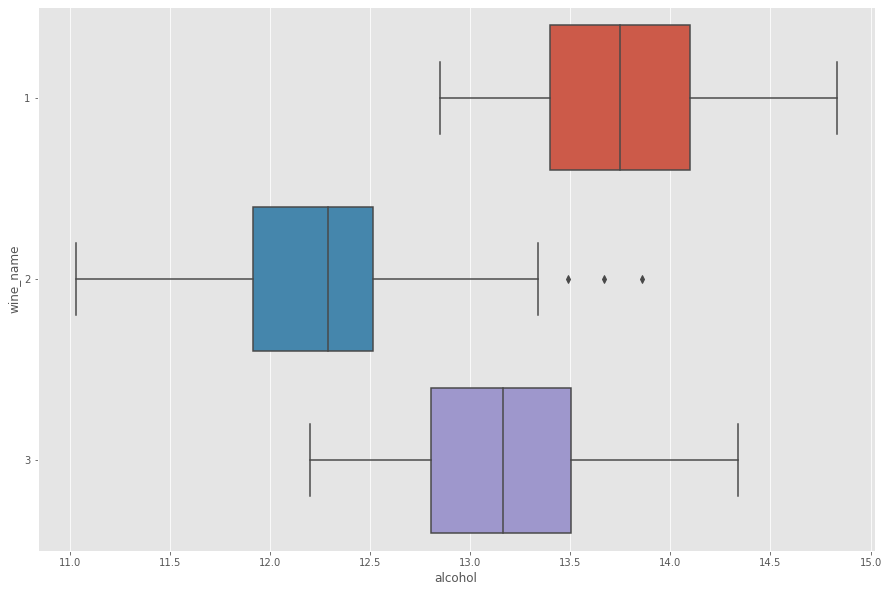

In [22]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

Looks like we have a few outliers in wine 2! May be an issue but we'll carry on for now.

<br>

### Assumption 5: Normality  

>"Your dependent variable should be approximately normally distributed for each category of the independent variable. We talk about the one-way ANOVA only requiring approximately normal data because it is quite "robust" to violations of normality, meaning that assumption can be a little violated and still provide valid results."

We use seaborn create a KDE plot to visualise the normality or otherwise.

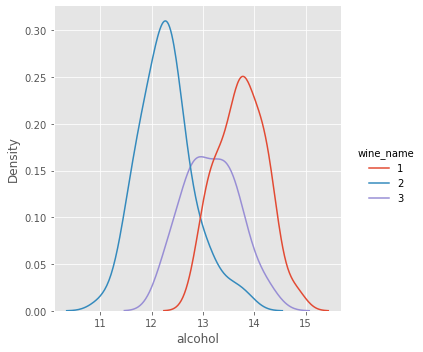

In [23]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

They all look roughly normal, but we can use a **shapiro-wilk** test to get a clearer idea. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  
https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php  

In [24]:
# shapiro-wilk test on wine 1
ss.shapiro(dependent[independent == '1'])

ShapiroResult(statistic=0.9808937311172485, pvalue=0.47905755043029785)

In [25]:
# shapiro-wilk test on wine 2
ss.shapiro(dependent[independent == '2'])

ShapiroResult(statistic=0.9720516800880432, pvalue=0.11396162211894989)

In [26]:
# shapiro-wilk test on wine 3
ss.shapiro(dependent[independent == '3'])

ShapiroResult(statistic=0.981467604637146, pvalue=0.6408376097679138)

If the pvalue is above 0.05 we can reject the null hypothesis. So **PASS**.

<br>

### Assumption 6: Homogeneity of Variances  

>"There needs to be homogeneity of variances. You can test this assumption ... using Levene's test for homogeneity of variances."

We use the built-in `levene()` function to test for variances - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [27]:
# Test for equal variances.
ss.levene(
    dependent[independent == '1'],
    dependent[independent == '2'],
    dependent[independent == '3']
)

LeveneResult(statistic=0.5997889815519192, pvalue=0.5500519055097621)

We're above 0.05 so we can reject the null hypothesis. So **PASS**.

<br>

## One-way ANOVA

Although the reslts of assumption 4 with the outliers looks a bit shakey we'll continue with the test. The functions for carrying this out in scipy.stats is `f_oneway()`. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

We pass each of the independent variables into the functions.

In [28]:
# ANOVA.
ss.f_oneway(
    dependent[independent == '1'],
    dependent[independent == '2'],
    dependent[independent == '3']
)

F_onewayResult(statistic=135.07762424279912, pvalue=3.319503795619655e-36)

Conclusion: as the pvalue is miniscule we reject the null hypothesis and can conclude that the mean alcohol level of **at least one** of the wines is different. To find out which one or ones are different we need to carry out a **post hoc** test.

<br>

### Tukey Post Hoc test

A Tukey post hoc test allows us to make pairwise comparisons between the means of each group.  
https://www.statology.org/tukey-test-python/

In [29]:
# tukey test - alpha = significance level
tukey = pairwise_tukeyhsd(endog=dependent,
                          groups=independent,
                          alpha=0.05)


# print results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   -1.466 0.001 -1.6792 -1.2528   True
     1      3   -0.591 0.001 -0.8262 -0.3558   True
     2      3    0.875 0.001  0.6489  1.1012   True
---------------------------------------------------


We can see that the `meandiff` between all of the groups is more than 0.05 so we can conclude that there is a statistically significant difference in means between all of the groups.

<br>

## REFERENCES
---

https://docs.scipy.org/doc/scipy/reference/stats.html  

https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

https://www.tutorialspoint.com/scipy/scipy_stats.htm

https://realpython.com/python-statistics/

https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php

https://www.statology.org/tukey-test-python/

Distributions
https://www.datacamp.com/community/tutorials/probability-distributions-python

https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.norm.html

# END